In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore",category=Warning)

In [268]:
#Loading the data
train = pd.read_csv('C:\\Users\\19258\\Downloads\\Cornerback1.csv')
test = pd.read_csv('C:\\Users\\19258\\Downloads\\2013CB.csv')

#Modifying the data
train.drop(['College', 'Pos', 'Year', 'Rk', 'School','Age'], axis = 1, inplace = True)
test.drop(['College', 'Pos', 'Year', 'Rk', 'School', 'AV','Age'], axis = 1, inplace = True)

#Fixing the height in the training set
train['HghtIn'] = train['Wt']
test['HghtIn'] = test['Wt']

#Adding pick to the dataset
train['Pick'] = train['Wt']
test['Pick'] = test['Wt']

for i in range(0, train.shape[0]):
    #Fixing the height
    temp = train['Height'][i].split('-')[0]
    temp_one = train['Height'][i].split('-')[1]
    if(temp_one == 'Jun'):
        train['Height'][i] = str("6-" + temp)
        train['HghtIn'][i] = 72 + int(temp)
    else:
        train['Height'][i] = str("5-" + temp)
        train['HghtIn'][i] = 60 + int(temp)
        
    #Fixing the name
    train['Player'][i] = train['Player'][i].split('\\')[0]
    
    #Adjusting the pick
    if('/' in str(train['Drafted (tm/rnd/yr)'][i])):
        placeholder = str(train['Drafted (tm/rnd/yr)'][i]).split('/')[2]
        #Going case by case
        if(str("th pick") in placeholder):
            train['Pick'][i] = float(placeholder.split('t')[0])
        elif(str("rd pick") in placeholder):
            train['Pick'][i] = float(placeholder.split('r')[0])
        elif(str("nd pick") in placeholder):
            train['Pick'][i] = float(placeholder.split('n')[0])
        elif(str("st pick") in placeholder):
            train['Pick'][i] = float(placeholder.split('s')[0])
        else:
            print("whoops:", placeholder)
    else:
        train['Pick'][i] = 255

    
for i in range(0, test.shape[0]):
    #Fixing the height
    temp = test['Height'][i].split('-')[0]
    temp_one = test['Height'][i].split('-')[1]
    if(temp_one == 'Jun'):
        test['Height'][i] = str("6-" + temp)
        test['HghtIn'][i] = 72 + int(temp)
    else:
        test['Height'][i] = str("5-" + temp)
        test['HghtIn'][i] = 60 + int(temp)
    
    #Fixing the name
    test['Player'][i] = test['Player'][i].split('\\')[0]
    
    #Adjusting the pick
    if('/' in str(test['Drafted (tm/rnd/yr)'][i])):
        placehold = str(test['Drafted (tm/rnd/yr)'][i]).split('/')[2]
        #Going case by case
        if(str("th pick") in placehold):
            test['Pick'][i] = float(placehold.split('t')[0])
        elif(str("rd pick") in placehold):
            test['Pick'][i] = float(placehold.split('r')[0])
        elif(str("nd pick") in placehold):
            test['Pick'][i] = float(placehold.split('n')[0])
        elif(str("st pick") in placehold):
            test['Pick'][i] = float(placehold.split('s')[0])
        else:
            print("whoops:", placehold)
    else:
        test['Pick'][i] = 255
    
#Filling in missing AV values with 0
train.AV.fillna(0, inplace = True)

target = train.AV
train.drop(['AV','Drafted (tm/rnd/yr)'], axis = 1, inplace = True)
test.drop(['Drafted (tm/rnd/yr)'], axis = 1, inplace = True)
combine = pd.concat([test, train], sort = False)


,Player,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,HghtIn,Pick
0,Trevin Wade,5-10,192,4.52,34.5,18.0,116.0,6.87,4.00,70,245
1,Ryan Steed,5-10,195,4.64,34.0,12.0,121.0,6.94,4.22,70,255
2,Coty Sensabaugh,5-11,189,4.33,37.0,15.0,122.0,6.60,4.06,71,115
3,Josh Robinson,5-10,199,4.29,38.5,17.0,133.0,6.55,3.97,70,66
4,Shaun Prater,5-10,190,4.50,NaN,14.0,NaN,NaN,NaN,70,156
5,Chaz Powell,6-0,203,4.42,33.0,17.0,121.0,6.84,4.16,72,255
6,Micah Pellerin,6-0,194,4.52,33.0,14.0,116.0,NaN,NaN,72,255
7,Josh Norman,6-0,197,4.61,33.0,14.0,124.0,7.09,4.23,72,143
8,Chase Minnifield,5-10,183,4.63,NaN,7.0,NaN,NaN,NaN,70,255
9,DeQuan Menzie,5-11,202,4.65,33.0,NaN,116.0,NaN,NaN,71,146


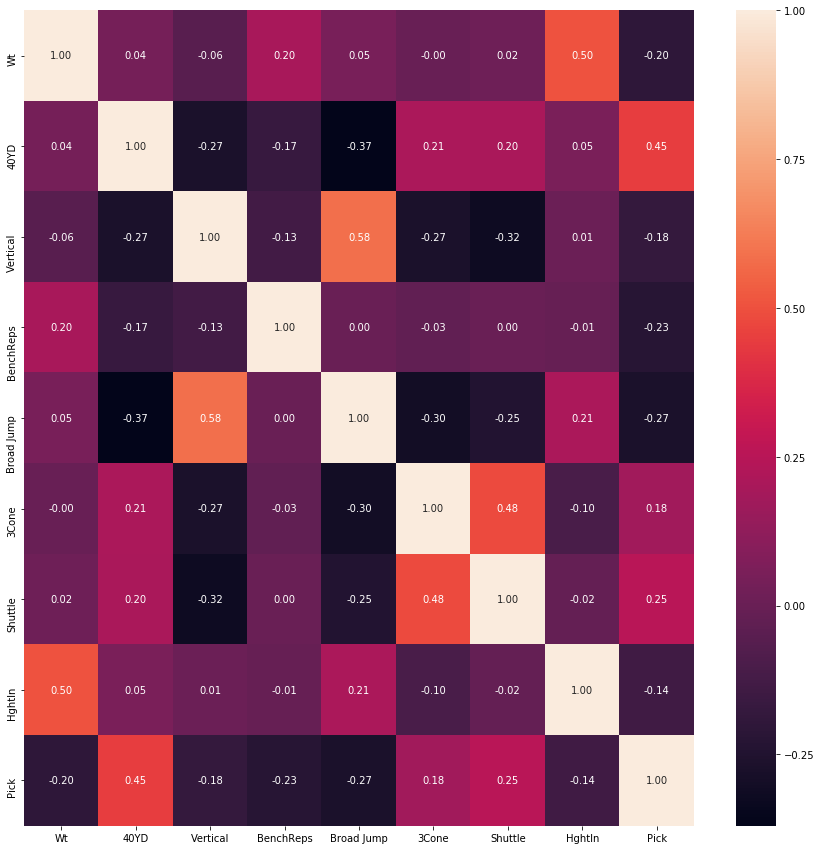

In [269]:
#looking at the correlation between different features
a, ax = plt.subplots(figsize = (15,15))
sns.heatmap(train.corr(), annot = True, fmt = '.2f', ax = ax)

#Finding the amount of null values
#train.isnull().sum()
train

In [270]:
#Filling in missing ages with median
#combine.Age.fillna(combine.Age.mode()[0], inplace = True)

#Filling missing 40 Yard Dash with median
combine['40YD'].fillna(combine['40YD'].median(), inplace = True)

#Using XGBoost to fill missing Shuttle times
#Creating the data
shuttle_x = combine[combine['Shuttle'].notnull()].drop(['Vertical','BenchReps','Broad Jump'
                                                    ,'Shuttle','3Cone','Player','Height'], axis = 1)
shuttle_y = combine[combine['Shuttle'].notnull()]['Shuttle']
shuttle_learn_x = combine[combine['Shuttle'].isnull()].drop(['Vertical','BenchReps','Broad Jump'
                                                    ,'Shuttle','3Cone','Player','Height'], axis = 1)
shuttle_learn_y = combine[combine['Shuttle'].isnull()]['Shuttle']
#learning from the data
from xgboost import XGBRegressor
shuttle_fill = XGBRegressor()
shuttle_fill.fit(shuttle_x, shuttle_y)
#Applying the data
shuttle_prediction = shuttle_fill.predict(shuttle_learn_x)
combine.Shuttle[combine.Shuttle.isnull()] = shuttle_prediction

[14:44:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [271]:
#Using XGBoost to fill missing 3Cone times
#Creating the data
cone_x = combine[combine['3Cone'].notnull()].drop(['Vertical','BenchReps','Broad Jump'
                                                    ,'3Cone','Player','Height'], axis = 1)
cone_y = combine[combine['3Cone'].notnull()]['3Cone']
cone_learn_x = combine[combine['3Cone'].isnull()].drop(['Vertical','BenchReps','Broad Jump'
                                                    ,'3Cone','Player','Height'], axis = 1)
cone_learn_y = combine[combine['3Cone'].isnull()]['3Cone']
#learning from the data
cone_fill = XGBRegressor()
cone_fill.fit(cone_x, cone_y)
#Applying the data
cone_prediction = cone_fill.predict(cone_learn_x)
combine['3Cone'][combine['3Cone'].isnull()] = cone_prediction

[14:44:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [272]:
#Using XGBoost to fill missing Broad Jump scores
#Creating the data
jump_x = combine[combine['Broad Jump'].notnull()].drop(['Vertical','BenchReps','Player','Height','Broad Jump'], axis = 1)
jump_y = combine[combine['Broad Jump'].notnull()]['Broad Jump']
jump_learn_x = combine[combine['Broad Jump'].isnull()].drop(['Vertical','BenchReps','Player','Height','Broad Jump'], axis = 1)
jump_learn_y = combine[combine['Broad Jump'].isnull()]['Broad Jump']

#Learning from the data
jump_fill = XGBRegressor()
jump_fill.fit(jump_x, jump_y)

#Applying the data
jump_prediction = jump_fill.predict(jump_learn_x)
combine['Broad Jump'][combine['Broad Jump'].isnull()] = jump_prediction

[14:44:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [273]:
#Using XGBoost to fill missing Bench Rep scores
#Creating the data
bench_x = combine[combine['BenchReps'].notnull()].drop(['Vertical','Player','Height','BenchReps'], axis = 1)
bench_y = combine[combine['BenchReps'].notnull()]['BenchReps']
bench_learn_x = combine[combine['BenchReps'].isnull()].drop(['Vertical','Player','Height','BenchReps'], axis = 1)
bench_learn_y = combine[combine['BenchReps'].isnull()]['BenchReps']

#Learning from the data
bench_fill = XGBRegressor()
bench_fill.fit(bench_x, bench_y)

#Applying the data
bench_prediction = bench_fill.predict(bench_learn_x)
combine['BenchReps'][combine['BenchReps'].isnull()] = bench_prediction

[14:44:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [274]:
#Using XGBoost to fill missing Vertical Jump scores
#Creating the data
vert_x = combine[combine['Vertical'].notnull()].drop(['Player','Height','Vertical'], axis = 1)
vert_y = combine[combine['Vertical'].notnull()]['Vertical']
vert_learn_x = combine[combine['Vertical'].isnull()].drop(['Player','Height','Vertical'], axis = 1)
vert_learn_y = combine[combine['Vertical'].isnull()]['Vertical']

#Learning from the data
vert_fill = XGBRegressor()
vert_fill.fit(vert_x, vert_y)

#Applying the data
vert_prediction = vert_fill.predict(vert_learn_x)
combine['Vertical'][combine['Vertical'].isnull()] = vert_prediction

[14:44:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [275]:
#Predicting the AV of 2019 Edge defenders
test_split = combine.iloc[0:test.shape[0],:]
train_split = combine.iloc[test.shape[0]:,:]
train_use = train_split.drop(['Player','Height'], axis = 1)
test_use = test_split.drop(['Player','Height'], axis = 1)
model = XGBRegressor()
model.fit(train_use, target)
prediction = model.predict(test_use)

[14:44:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [276]:
for i in range(0, prediction.size):
    prediction[i] = int(prediction[i])
    
prediction

array([ 5.,  1.,  1., 15., 16., 50., 14.,  4., 36.,  7., 15.,  7., 39.,
        5., 65., 16., 11., 11.,  1.,  1.,  8., -1., 62.,  8., 19.,  7.,
       18.,  0., 30.,  1., 14., 20.,  6.,  5., 13., 10.], dtype=float32)

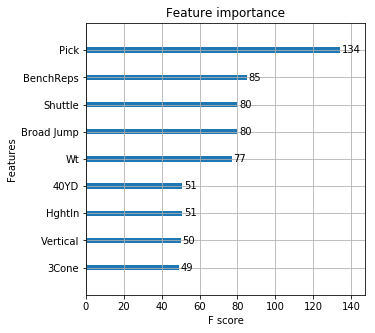

In [277]:
import xgboost as xgb
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [278]:
#Formatting predictions so that it's easier to see
test_use['Predicted_AV'] = prediction
test_use['Player'] = test['Player']
test_use['Pick'] = test['Pick']
test_use.sort_values(['Predicted_AV'], ascending = False, inplace = True)
test_use

,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,HghtIn,Pick,Predicted_AV,Player
14,201,4.37,36.000000,14.450687,122.000000,6.950000,4.320000,72,9,65.0,Dee Milliner
22,191,4.40,35.963333,16.739307,122.913551,6.802592,4.069940,71,12,62.0,D.J. Hayden
5,190,4.38,37.500000,16.000000,125.000000,6.798095,3.850000,72,22,50.0,Desmond Trufant
12,210,4.43,40.500000,14.000000,132.000000,6.934160,4.088648,73,25,39.0,Xavier Rhodes
8,192,4.36,35.500000,14.000000,124.000000,6.900000,4.210000,72,36,36.0,Darius Slay
28,185,4.61,34.000000,10.000000,125.000000,6.970000,4.270000,74,43,30.0,Johnthan Banks
31,188,4.39,40.000000,17.000000,132.000000,6.890000,4.230000,70,60,20.0,Robert Alford
24,201,4.47,38.000000,22.000000,125.000000,6.700000,4.150000,71,64,19.0,Dwayne Gratz
26,216,4.41,34.500000,14.504562,117.000000,7.100000,4.300000,72,134,18.0,Sanders Commings
15,193,4.40,33.500000,14.000000,119.000000,6.710000,4.180000,71,149,16.0,Brandon McGee
